## Final Project Submission

Please fill out:
* Student name: Henry Van Gorp
* Student pace: self paced
* Scheduled project review date/time: TBD
* Instructor name: Abhineet Kulkarni
* Blog post URL: TBD


# Business Understanding

# Data Understanding

The data which is being utlized for this project focuses

### Import Packages

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# import necessary packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv("./data/kc_house_data.csv")

data.reset_index(inplace = True)

In [3]:
data.head()

,index,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
#There is a column which should be an integer but is labeled as an object.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          21597 non-null  int64  
 1   id             21597 non-null  int64  
 2   date           21597 non-null  object 
 3   price          21597 non-null  float64
 4   bedrooms       21597 non-null  int64  
 5   bathrooms      21597 non-null  float64
 6   sqft_living    21597 non-null  int64  
 7   sqft_lot       21597 non-null  int64  
 8   floors         21597 non-null  float64
 9   waterfront     19221 non-null  object 
 10  view           21534 non-null  object 
 11  condition      21597 non-null  object 
 12  grade          21597 non-null  object 
 13  sqft_above     21597 non-null  int64  
 14  sqft_basement  21597 non-null  object 
 15  yr_built       21597 non-null  int64  
 16  yr_renovated   17755 non-null  float64
 17  zipcode        21597 non-null  int64  
 18  lat   

In [5]:
data.describe()

,index,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21597.000000,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,10798.000000,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,6234.661218,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,0.000000,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,5399.000000,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,10798.000000,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,16197.000000,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,21596.000000,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


# Data Preparation

## Clean Data

In [6]:
data['sqft_basement'].value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
1525.0        1
915.0         1
1024.0        1
1770.0        1
506.0         1
Name: sqft_basement, Length: 304, dtype: int64

In [7]:
data['sqft_basement'].replace('?',np.nan,inplace=True)

In [8]:
data.sqft_basement = data.sqft_basement.astype("float")

In [9]:
data.sqft_basement.fillna(data['sqft_basement'].mean(),inplace=True)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          21597 non-null  int64  
 1   id             21597 non-null  int64  
 2   date           21597 non-null  object 
 3   price          21597 non-null  float64
 4   bedrooms       21597 non-null  int64  
 5   bathrooms      21597 non-null  float64
 6   sqft_living    21597 non-null  int64  
 7   sqft_lot       21597 non-null  int64  
 8   floors         21597 non-null  float64
 9   waterfront     19221 non-null  object 
 10  view           21534 non-null  object 
 11  condition      21597 non-null  object 
 12  grade          21597 non-null  object 
 13  sqft_above     21597 non-null  int64  
 14  sqft_basement  21597 non-null  float64
 15  yr_built       21597 non-null  int64  
 16  yr_renovated   17755 non-null  float64
 17  zipcode        21597 non-null  int64  
 18  lat   

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          21597 non-null  int64  
 1   id             21597 non-null  int64  
 2   date           21597 non-null  object 
 3   price          21597 non-null  float64
 4   bedrooms       21597 non-null  int64  
 5   bathrooms      21597 non-null  float64
 6   sqft_living    21597 non-null  int64  
 7   sqft_lot       21597 non-null  int64  
 8   floors         21597 non-null  float64
 9   waterfront     19221 non-null  object 
 10  view           21534 non-null  object 
 11  condition      21597 non-null  object 
 12  grade          21597 non-null  object 
 13  sqft_above     21597 non-null  int64  
 14  sqft_basement  21597 non-null  float64
 15  yr_built       21597 non-null  int64  
 16  yr_renovated   17755 non-null  float64
 17  zipcode        21597 non-null  int64  
 18  lat   

### Check Null Values

In [12]:
data.isna().sum()

index               0
id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

## Visualizing Distributions

### Histograms

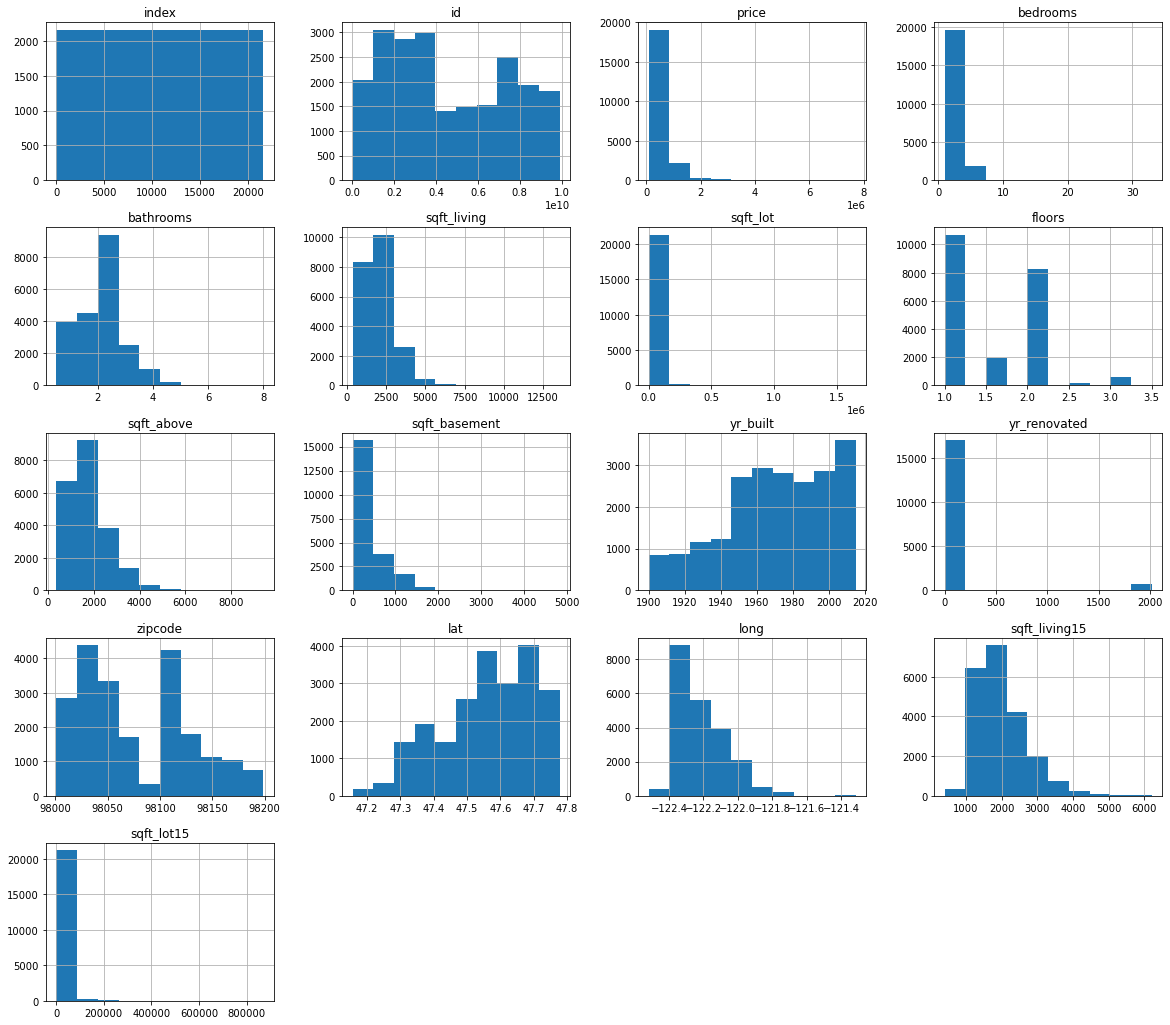

In [13]:
data.hist(figsize = (20, 18));

### Check for Linearity

Checking for linearity between price and the squarefeet of living space.  sqft_living seems to have a linear relationship with list_price.

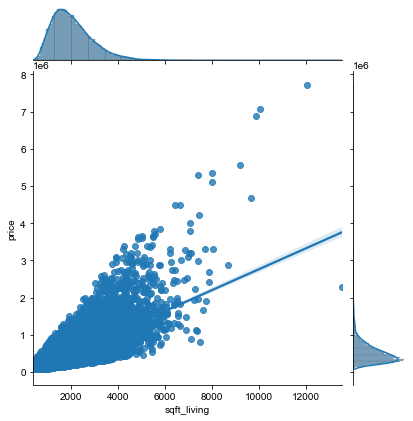

In [14]:
sns.jointplot('sqft_living', 'price', data=data, kind='reg')
plt.style.use('seaborn')
sns.set_style("darkgrid")

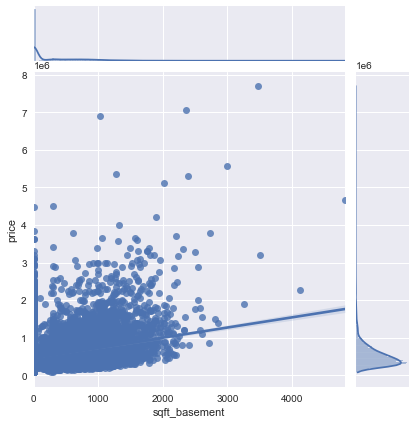

In [29]:
sns.jointplot('sqft_basement', 'price', data=data, kind='reg')
plt.style.use('seaborn')
sns.set_style("darkgrid")

Checking for linearity between price and the amount of floors.  Seems that price and floors has a slight linear relationship.

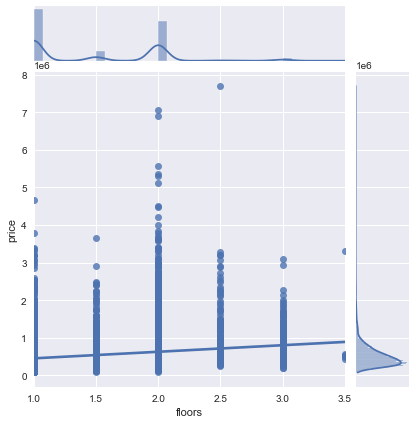

In [15]:
sns.jointplot('floors', 'price', data=data, kind='reg')
plt.style.use('seaborn')
sns.set_style("darkgrid")

Checking for linearity between price and bathrooms.  Bathrooms and price have a linear relationship.

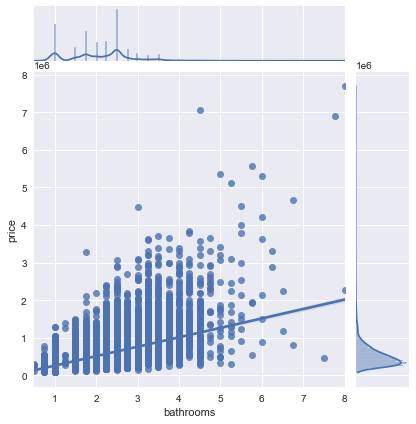

In [16]:
sns.jointplot('bathrooms', 'price', data=data, kind='reg')
plt.style.use('seaborn')
sns.set_style("darkgrid")

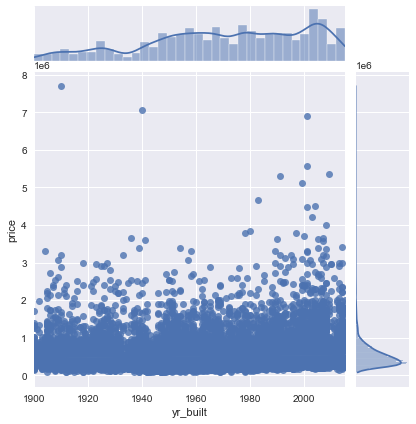

In [17]:
sns.jointplot('yr_built', 'price', data=data, kind='reg')
plt.style.use('seaborn')
sns.set_style("darkgrid")

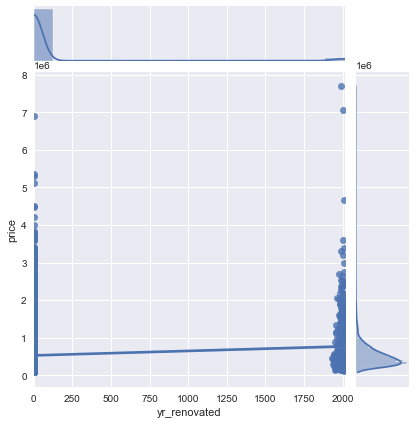

In [18]:
sns.jointplot('yr_renovated', 'price', data=data, kind='reg')
plt.style.use('seaborn')
sns.set_style("darkgrid")

### Check for Multicolinearity

<AxesSubplot:>

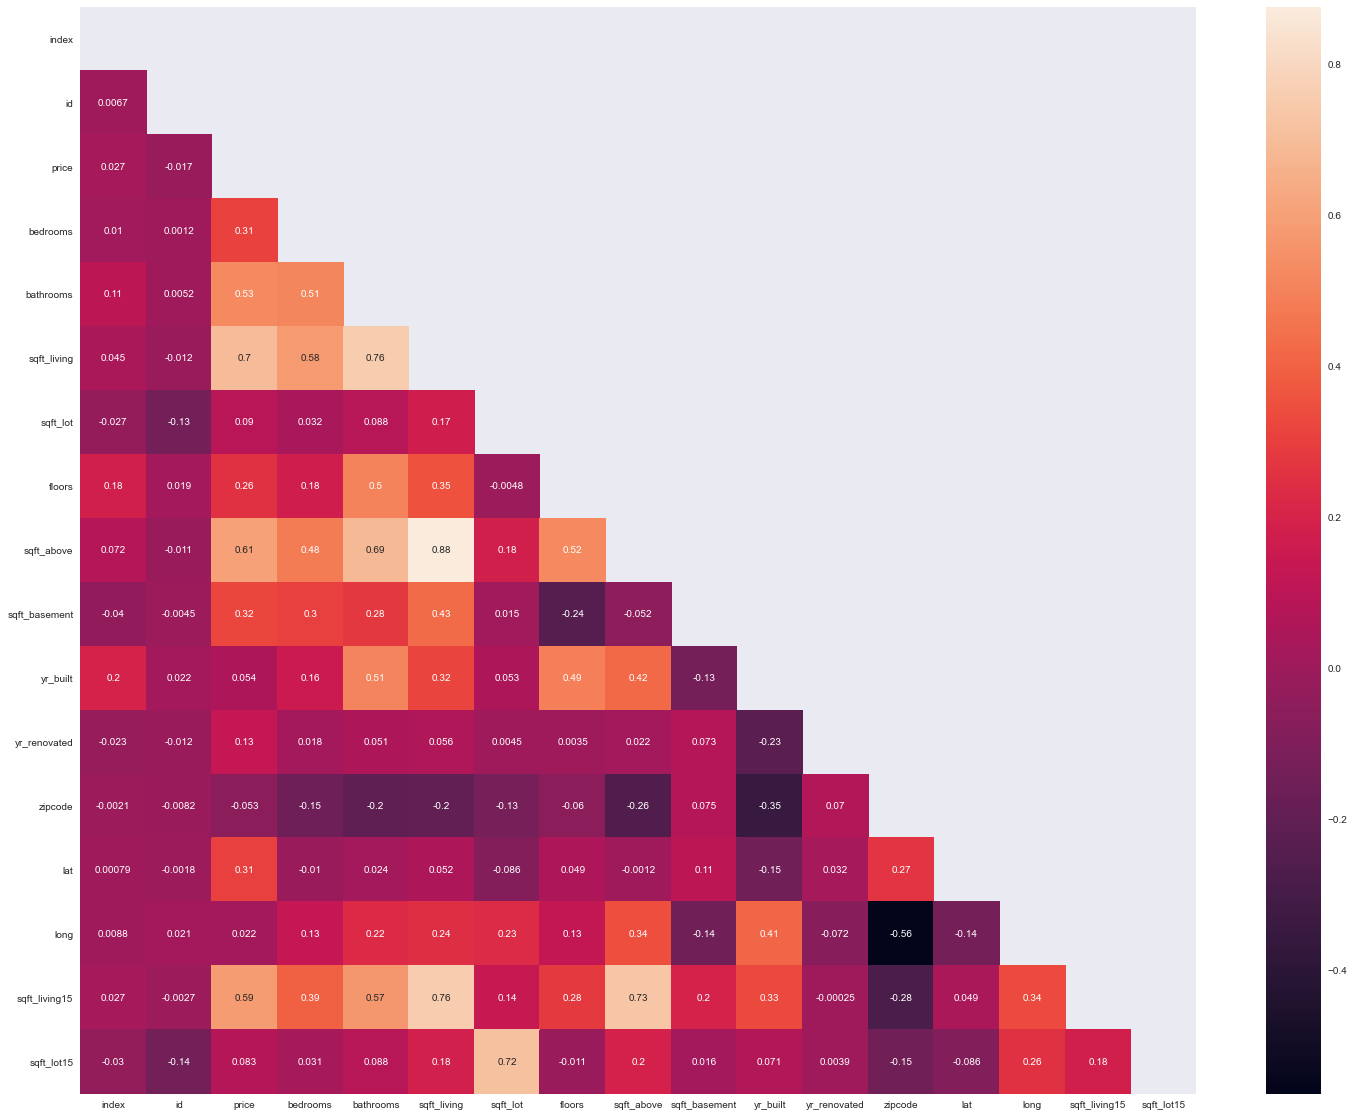

In [19]:
corr = data.corr()
trimask = np.triu(np.ones_like(corr, dtype = 'bool'))
plt.figure(figsize=(25,20))
sns.heatmap(corr, mask = trimask, annot = True)

# Modeling

## Create Baseline Model

In [20]:
price = data['price']

In [30]:
features = ['sqft_living', 'sqft_above', 'bathrooms', 'bedrooms', 'floors', 'sqft_lot', 'sqft_basement']

In [31]:
model_data = data.loc[:, features]

In [32]:
import statsmodels.api as sm

baseline_model = sm.OLS(price, model_data).fit()
baseline_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.844
Model:                            OLS   Adj. R-squared (uncentered):              0.844
Method:                 Least Squares   F-statistic:                          1.673e+04
Date:                Wed, 02 Feb 2022   Prob (F-statistic):                        0.00
Time:                        11:57:01   Log-Likelihood:                     -2.9974e+05
No. Observations:               21597   AIC:                                  5.995e+05
Df Residuals:                   21590   BIC:                                  5.995e+05
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
sqft_living     258.2167     27.057      9.543      0.000     205.182     311.251
sqft_above       43.2985     27.071      1.599      0.110      -9.764      96.360
bathrooms      6149.8465   3850.382      1.597      0.110   -1397.187    1.37e+04
bedrooms      -4.609e+04   1822.624    -25.287      0.000   -4.97e+04   -4.25e+04
floors         2.997e+04   3899.906      7.684      0.000    2.23e+04    3.76e+04
sqft_lot         -0.3096      0.043     -7.143      0.000      -0.395      -0.225
sqft_basement    82.9926     27.150      3.057      0.002      29.776     136.209
==============================================================================
Omnibus:                    13884.138   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           448940.588
Skew:                           2.600   Prob(JB):                         0.00
Kurtosis:                      24.722   Cond. No.                     1.18e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.18e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Remodeling

In [33]:
features_2 = ['sqft_living', 'bedrooms', 'floors', 'sqft_lot', 'sqft_basement']

In [34]:
model_data2 = data.loc[:, features_2]

In [35]:
model2 = sm.OLS(price, model_data2).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.844
Model:                            OLS   Adj. R-squared (uncentered):              0.844
Method:                 Least Squares   F-statistic:                          2.342e+04
Date:                Wed, 02 Feb 2022   Prob (F-statistic):                        0.00
Time:                        11:57:36   Log-Likelihood:                     -2.9974e+05
No. Observations:               21597   AIC:                                  5.995e+05
Df Residuals:                   21592   BIC:                                  5.995e+05
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
sqft_living     303.8085      2.834    107.187      0.000     298.253     309.364
bedrooms      -4.536e+04   1756.048    -25.832      0.000   -4.88e+04   -4.19e+04
floors          3.35e+04   3414.321      9.811      0.000    2.68e+04    4.02e+04
sqft_lot         -0.3087      0.043     -7.123      0.000      -0.394      -0.224
sqft_basement    41.2983      5.014      8.237      0.000      31.471      51.125
==============================================================================
Omnibus:                    13889.231   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           450502.747
Skew:                           2.601   Prob(JB):                         0.00
Kurtosis:                      24.762   Cond. No.                     8.91e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 8.91e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [36]:
import statsmodels.api as sm
import scipy.stats as stats

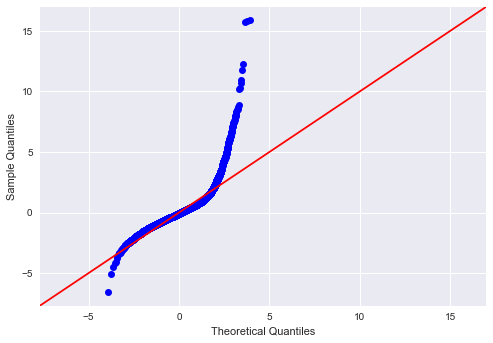

In [37]:
fig = sm.graphics.qqplot(model2.resid, dist=stats.norm, line='45', fit=True)